/home/vicente/anaconda3/envs/torch11/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


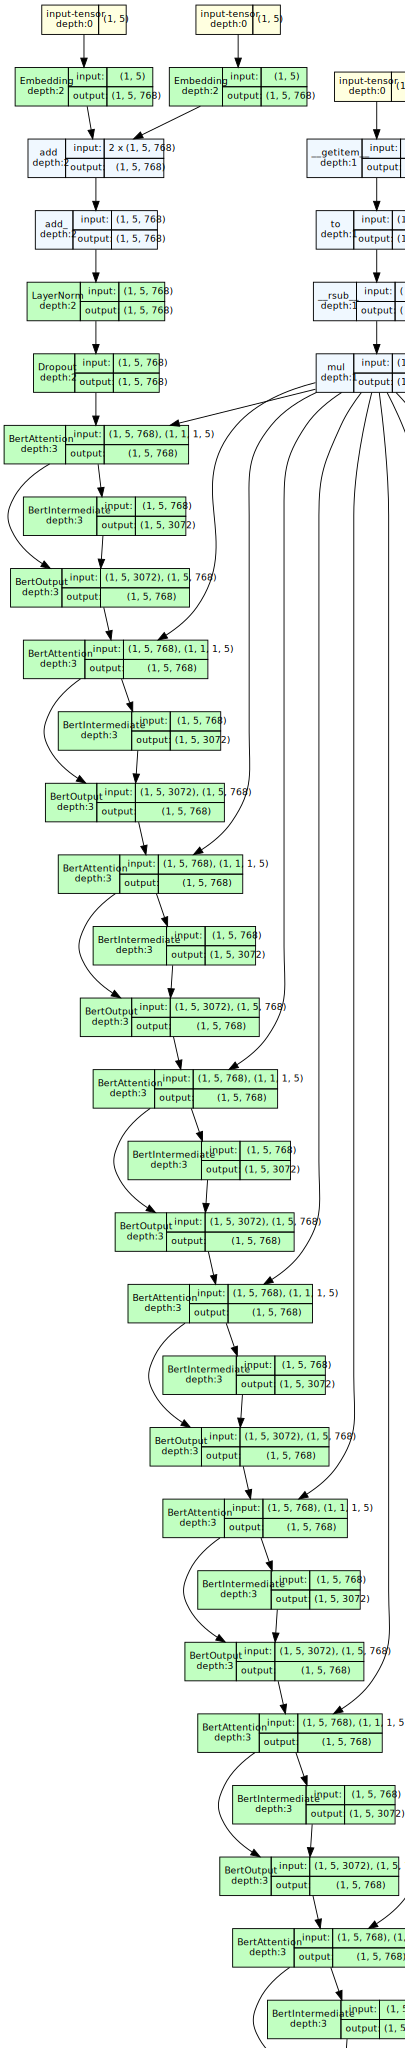

In [1]:
# PLOT model

from transformers import AutoModel, AutoTokenizer
from torchview import draw_graph
model1 = AutoModel.from_pretrained("bert-base-uncased")

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

inputs = tokenizer("Hello world!", return_tensors="pt")

model_graph = draw_graph(model1, input_data=inputs)

model_graph.visual_graph

In [4]:
from model_utils_bert import BertLinear, BertRnn, BertRnnAtt, BertRnnSigmoid
from model_utils_tape import TapeLinear, TapeRnn, TapeRnnAtt
from transformers import Trainer, TrainingArguments, BertConfig, AdamW
from transformers import AutoModel, AutoTokenizer
from transformers import BertTokenizer
from torchview import draw_graph


model_name = "pre_trained_models/esm2_t6_8M_UR50D"          # train 
config = BertConfig.from_pretrained(model_name, num_labels=2)
config.rnn = "lstm"
config.num_rnn_layer = 2
config.rnn_dropout = 0.1
config.rnn_hidden = 768
config.length = 50
config.cnn_filters = 512
config.cnn_dropout = 0.1  
model_ = BertRnn.from_pretrained(model_name, config=config)
tokenizer = BertTokenizer.from_pretrained(model_name, do_lower_case=False)
inputs = tokenizer("A E T C Z A", return_tensors="pt")
model_graph = draw_graph(model_, input_data=inputs)
model_graph.visual_graph

#model1 = AutoModel.from_pretrained("bert-base-uncased")
#tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
#model = AutoModel.from_pretrained("bert-base-uncased")
#inputs = tokenizer("A E T C Z A O", return_tensors="pt")
#model_graph = draw_graph(model1, input_data=inputs)
#model_graph.visual_graph

You are using a model of type esm to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at pre_trained_models/esm2_t6_8M_UR50D were not used when initializing BertRnn: ['esm.encoder.layer.5.attention.self.value.weight', 'esm.encoder.layer.3.LayerNorm.bias', 'esm.encoder.layer.3.attention.self.query.bias', 'esm.encoder.layer.4.attention.output.dense.bias', 'esm.encoder.layer.3.attention.self.key.weight', 'esm.encoder.emb_layer_norm_after.weight', 'esm.encoder.layer.1.attention.LayerNorm.bias', 'esm.encoder.layer.0.intermediate.dense.weight', 'esm.encoder.layer.4.LayerNorm.bias', 'esm.encoder.layer.5.attention.self.key.weight', 'esm.encoder.layer.3.attention.LayerNorm.weight', 'esm.encoder.layer.4.attention.LayerNorm.weight', 'esm.encoder.layer.4.attention.LayerNorm.bias', 'esm.encoder.layer.0.output.dense.weight', 'esm.encoder.emb_layer_norm_after.bias', 'esm.encoder.layer.4.attention.self.k

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.